https://www.geeksforgeeks.org/how-to-find-the-optimal-value-of-k-in-knn/

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://www.geeksforgeeks.org/k-nearest-neighbours/

### 🟦 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

### 🟦 Getting Cleaned Data from Repository

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Alireza-Esp/VFCPM/refs/heads/main/Data/data-cleaned.csv")

In [3]:
data

,Model year,Make,Vehicle class,Engine size (L),Cylinders,Transmission,Number of gears,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
0,1995,Acura,Subcompact,1.8,4,A,4,Regular gasoline,11.6,8.3,10.1,232
1,1995,Acura,Subcompact,1.8,4,M,5,Regular gasoline,11.0,8.3,9.8,225
2,1995,Acura,Subcompact,1.8,4,M,5,Premium gasoline,10.8,8.3,9.7,223
3,1995,Acura,Compact,3.2,6,A,4,Premium gasoline,14.2,10.5,12.5,288
4,1995,Acura,Compact,3.2,6,A,4,Premium gasoline,14.6,11.0,13.0,299
...,...,...,...,...,...,...,...,...,...,...,...,...
27507,2025,Volvo,Station wagon,2.0,4,AS,8,Premium gasoline,9.7,7.5,8.7,205
27508,2025,Volvo,Station wagon,2.0,4,AS,8,Premium gasoline,10.7,8.1,9.5,223
27509,2025,Volvo,Sport utility vehicle,2.0,4,AS,8,Premium gasoline,10.1,7.8,9.1,213
27510,2025,Volvo,Sport utility vehicle,2.0,4,AS,8,Premium gasoline,10.0,7.8,9.0,212


### 🟦 Data Preprocesing

🔹 Showing th Correlation of variables of dataset

<Axes: >

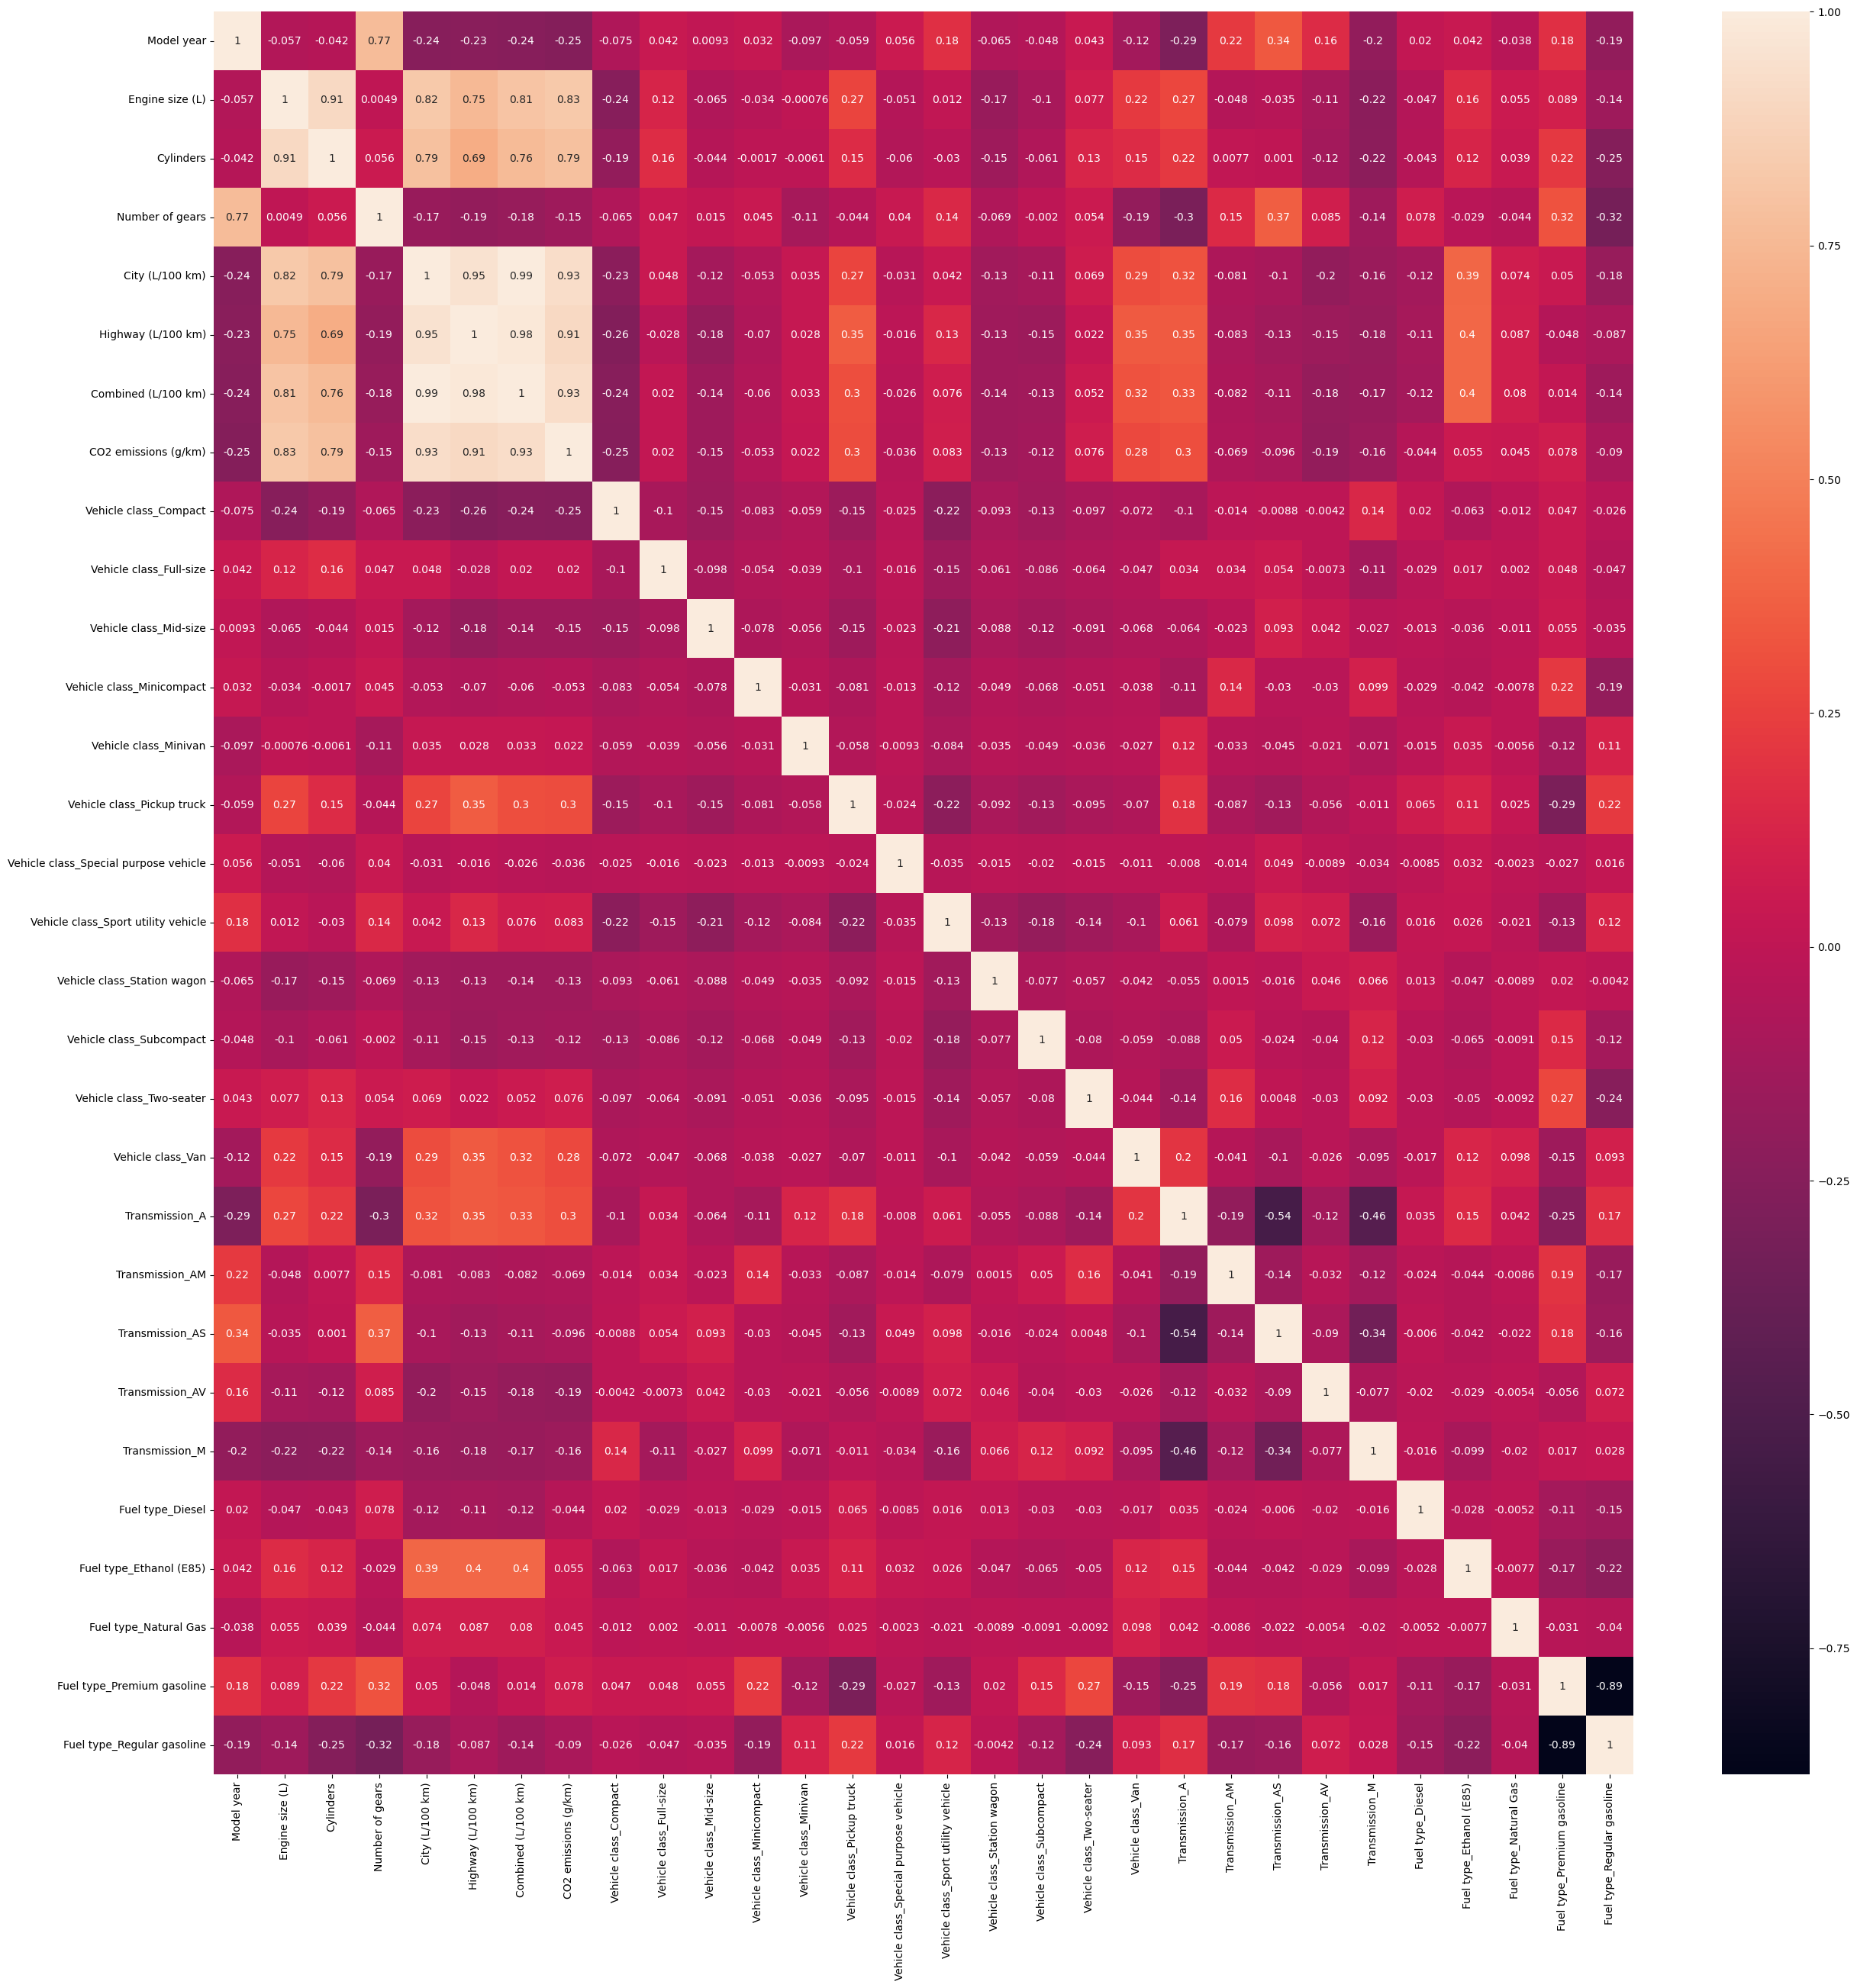

In [4]:
corr = pd.get_dummies(data[["Vehicle class", "Transmission","Fuel type", "Model year", "Engine size (L)", "Cylinders", "Number of gears", "City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)", "CO2 emissions (g/km)"]]).corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr, annot=True)

🔹 Splitting Data to Categorical and Numerical X and y sets

In [5]:
X_cat = data.loc[:, ["Make", "Vehicle class", "Transmission","Fuel type"]]
X_num = data.loc[:, ["Model year", "Engine size (L)", "Cylinders", "Number of gears"]]
y_city = data.loc[:, ["City (L/100 km)"]]
y_highway = data.loc[:, ["Highway (L/100 km)"]]
y_combined = data.loc[:, ["Combined (L/100 km)"]]
y_co2 = data.loc[:, ["CO2 emissions (g/km)"]]

🔹 Encoding categorical data (X_cat)

In [6]:
encoder = OneHotEncoder()

X_cat_ENCODED = pd.DataFrame(encoder.fit_transform(X_cat).toarray())
X_cat_ENCODED.columns = X_cat_ENCODED.columns.astype(str)

with open("encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)

In [7]:
X_cat_ENCODED

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
encoder.transform([["Chevrolet", "Station wagon", "M", "Premium gasoline"]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [9]:
encoder.inverse_transform([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]])

array([['Honda', 'Minivan', 'AM', 'Premium gasoline']], dtype=object)

In [10]:
X_new = pd.concat([X_cat_ENCODED, X_num], axis=1)

In [11]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,Model year,Engine size (L),Cylinders,Number of gears
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1995,1.8,4,4
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1995,1.8,4,5
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1995,1.8,4,5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1995,3.2,6,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1995,3.2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8


🔹 Splitting X and y to train and test sets

In [12]:
X_train, X_test, y_train_city, y_test_city = train_test_split(X_new, y_city, test_size=0.15, random_state=0)
X_train, X_test, y_train_highway, y_test_highway = train_test_split(X_new, y_highway, test_size=0.15, random_state=0)
X_train, X_test, y_train_combined, y_test_combined = train_test_split(X_new, y_combined, test_size=0.15, random_state=0)
X_train, X_test, y_train_co2, y_test_co2 = train_test_split(X_new, y_co2, test_size=0.15, random_state=0)

🔹 Standardizng X_train data

In [13]:
standardizer = StandardScaler()

X_train_STANDARDED = standardizer.fit_transform(X_train)

with open("standardizer.pkl", "wb") as standardizer_file:
    pickle.dump(standardizer, standardizer_file)

In [14]:
pd.DataFrame(X_train_STANDARDED)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.109085,-0.048554,-0.067159,-0.192668,3.775500,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,0.647270,-0.274975,0.069401,1.288009
1,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-0.424958,1.446698,1.172324,-1.200586
2,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,3.102373,...,1.851976,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-1.854596,1.746119,1.172324,-0.578437
3,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,1.242952,-0.274975,0.069401,1.288009
4,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,1.851976,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.544095,3.692358,2.275247,0.043711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23380,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.067549,2.494672,3.378169,0.043711
23381,-0.109085,-0.048554,-0.067159,-0.192668,3.775500,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,7.394496,-0.205552,-0.038158,-0.833185,-1.062547,0.766406,-1.023529,-1.033521,1.288009
23382,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.424958,0.922710,1.172324,1.288009
23383,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-0.305822,-0.499541,0.069401,-0.578437


### 🟦 Model Training

##### 🔹 Random Forests

Model training

In [15]:
model_city_rf = RandomForestRegressor()
model_highway_rf = RandomForestRegressor()
model_combined_rf = RandomForestRegressor()
model_co2_rf = RandomForestRegressor()

model_city_rf.fit(X_train_STANDARDED, y_train_city)
model_highway_rf.fit(X_train_STANDARDED, y_train_highway)
model_combined_rf.fit(X_train_STANDARDED, y_train_combined)
model_co2_rf.fit(X_train_STANDARDED, y_train_co2)

RandomForestRegressor()

predicting with X_test

In [16]:
y_pred_city_rf = model_city_rf.predict(standardizer.transform(X_test))
y_pred_highway_rf = model_highway_rf.predict(standardizer.transform(X_test))
y_pred_combined_rf = model_combined_rf.predict(standardizer.transform(X_test))
y_pred_co2_rf = model_co2_rf.predict(standardizer.transform(X_test))

Evaluating the model

In [17]:
print(round(r2_score(y_test_city, y_pred_city_rf), 3) * 100)
print(round(r2_score(y_test_highway, y_pred_highway_rf), 3) * 100)
print(round(r2_score(y_test_combined, y_pred_combined_rf), 3) * 100)
print(round(r2_score(y_test_co2, y_pred_co2_rf), 3) * 100)

96.0
94.1
95.6
94.8


##### 🔹 Decision Tree

Model training

In [18]:
model_city_dt = DecisionTreeRegressor()
model_highway_dt = DecisionTreeRegressor()
model_combined_dt = DecisionTreeRegressor()
model_co2_dt = DecisionTreeRegressor()

model_city_dt.fit(X_train_STANDARDED, y_train_city)
model_highway_dt.fit(X_train_STANDARDED, y_train_highway)
model_combined_dt.fit(X_train_STANDARDED, y_train_combined)
model_co2_dt.fit(X_train_STANDARDED, y_train_co2)

DecisionTreeRegressor()

predicting with X_test

In [19]:
y_pred_city_dt = model_city_dt.predict(standardizer.transform(X_test))
y_pred_highway_dt = model_highway_dt.predict(standardizer.transform(X_test))
y_pred_combined_dt = model_combined_dt.predict(standardizer.transform(X_test))
y_pred_co2_dt = model_co2_dt.predict(standardizer.transform(X_test))

Evaluating the model

In [20]:
print(round(r2_score(y_test_city, y_pred_city_dt), 3) * 100)
print(round(r2_score(y_test_highway, y_pred_highway_dt), 3) * 100)
print(round(r2_score(y_test_combined, y_pred_combined_dt), 3) * 100)
print(round(r2_score(y_test_co2, y_pred_co2_dt), 3) * 100)

94.6
92.80000000000001
94.5
93.60000000000001


##### 🔹 K-Nearest Neighbors

Model training

In [21]:
model_city_knn = KNeighborsRegressor()
model_highway_knn = KNeighborsRegressor()
model_combined_knn = KNeighborsRegressor()
model_co2_knn = KNeighborsRegressor()

model_city_knn.fit(X_train_STANDARDED, y_train_city)
model_highway_knn.fit(X_train_STANDARDED, y_train_highway)
model_combined_knn.fit(X_train_STANDARDED, y_train_combined)
model_co2_knn.fit(X_train_STANDARDED, y_train_co2)

KNeighborsRegressor()

predicting with X_test

In [22]:
y_pred_city_knn = model_city_knn.predict(standardizer.transform(X_test))
y_pred_highway_knn = model_highway_knn.predict(standardizer.transform(X_test))
y_pred_combined_knn = model_combined_knn.predict(standardizer.transform(X_test))
y_pred_co2_knn = model_co2_knn.predict(standardizer.transform(X_test))

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Evaluating the model

In [23]:
print(round(r2_score(y_test_city, y_pred_city_knn), 3) * 100)
print(round(r2_score(y_test_highway, y_pred_highway_knn), 3) * 100)
print(round(r2_score(y_test_combined, y_pred_combined_knn), 3) * 100)
print(round(r2_score(y_test_co2, y_pred_co2_knn), 3) * 100)

93.89999999999999
92.9
93.89999999999999
92.9


##### 🔹 Linear Regression

Model training

In [24]:
model_city_lr = LinearRegression()
model_highway_lr = LinearRegression()
model_combined_lr = LinearRegression()
model_co2_lr = LinearRegression()

model_city_lr.fit(X_train_STANDARDED, y_train_city)
model_highway_lr.fit(X_train_STANDARDED, y_train_highway)
model_combined_lr.fit(X_train_STANDARDED, y_train_combined)
model_co2_lr.fit(X_train_STANDARDED, y_train_co2)

LinearRegression()

predicting with X_test

In [25]:
y_pred_city_lr = model_city_lr.predict(standardizer.transform(X_test))
y_pred_highway_lr = model_highway_lr.predict(standardizer.transform(X_test))
y_pred_combined_lr = model_combined_lr.predict(standardizer.transform(X_test))
y_pred_co2_lr = model_co2_lr.predict(standardizer.transform(X_test))

Evaluating the model

In [26]:
print(round(r2_score(y_test_city, y_pred_city_lr), 3) * 100)
print(round(r2_score(y_test_highway, y_pred_highway_lr), 3) * 100)
print(round(r2_score(y_test_combined, y_pred_combined_lr), 3) * 100)
print(round(r2_score(y_test_co2, y_pred_co2_lr), 3) * 100)

88.1
84.5
87.7
85.3


In [15]:
model_fuel = KNeighborsRegressor(n_neighbors=2, metric="euclidean")
model_CO2 = KNeighborsRegressor(n_neighbors=2, metric="euclidean")

model_fuel.fit(X_train_STANDARDED, y_train_fuel)
model_CO2.fit(X_train_STANDARDED, y_train_CO2)

with open("model-fuel.pkl", "wb") as model_fuel_file:
    pickle.dump(model_fuel, model_fuel_file)
with open("model-CO2.pkl", "wb") as model_CO2_file:
    pickle.dump(model_CO2, model_CO2_file)

In [16]:
y_pred_fuel = model_fuel.predict(standardizer.transform(X_test))
y_pred_CO2 = model_CO2.predict(standardizer.transform(X_test))

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


🔹 Evaluating the model

In [17]:
print("For fuel model:")
print("   R2 Score =  " + str(round(r2_score(y_test_fuel, y_pred_fuel), 3) * 100) + "%")
print("   MSE = " + str(round(mean_squared_error(y_test_fuel, y_pred_fuel), 2)))
print("   MAE = " + str(round(mean_absolute_error(y_test_fuel, y_pred_fuel), 2)))

print("For CO2 model:")
print("   R2 Score = " + str(round(r2_score(y_test_CO2, y_pred_CO2), 3) * 100) + "%")
print("   MSE = " + str(round(mean_squared_error(y_test_CO2, y_pred_CO2), 2)))
print("   MAE = " + str(round(mean_absolute_error(y_test_CO2, y_pred_CO2), 2)))

For fuel model:
   R2 Score =  94.6%
   MSE = 0.54
   MAE = 0.47
For CO2 model:
   R2 Score = 93.4%
   MSE = 281.31
   MAE = 10.67


🔹 Finding best values for hyperparameters of model

for 1 neighbor:
   R2_score for fuel model = 93.4%
   R2_score for CO2 model = 91.9%
   MSE for fuel model = 0.66
   MSE for CO2 model = 344
   MAE for fuel model = 0
   MAE for CO2 model = 11

for 2 neighbor:
   R2_score for fuel model = 94.6%
   R2_score for CO2 model = 93.4%
   MSE for fuel model = 0.54
   MSE for CO2 model = 281
   MAE for fuel model = 0
   MAE for CO2 model = 11

for 3 neighbor:
   R2_score for fuel model = 94.6%
   R2_score for CO2 model = 93.4%
   MSE for fuel model = 0.54
   MSE for CO2 model = 280
   MAE for fuel model = 0
   MAE for CO2 model = 11

for 4 neighbor:
   R2_score for fuel model = 94.3%
   R2_score for CO2 model = 93.2%
   MSE for fuel model = 0.56
   MSE for CO2 model = 292
   MAE for fuel model = 1
   MAE for CO2 model = 11

for 5 neighbor:
   R2_score for fuel model = 94.1%
   R2_score for CO2 model = 92.9%
   MSE for fuel model = 0.59
   MSE for CO2 model = 305
   MAE for fuel model = 1
   MAE for CO2 model = 12

for 6 neighbor:
   R2_score fo

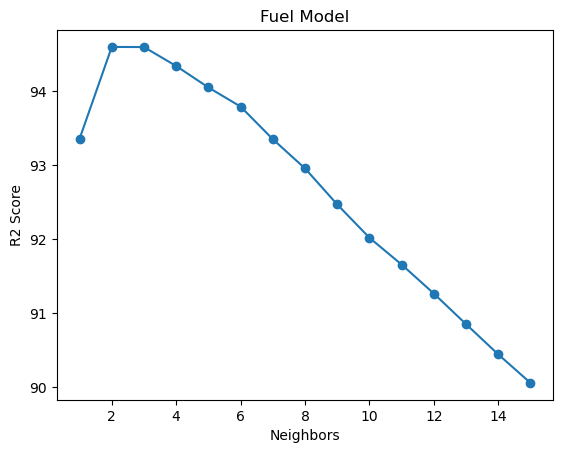

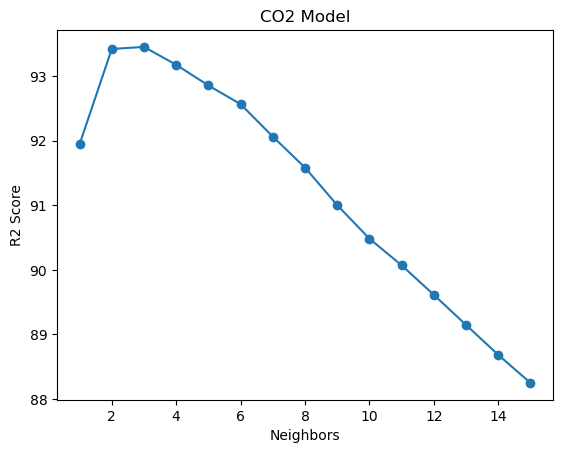

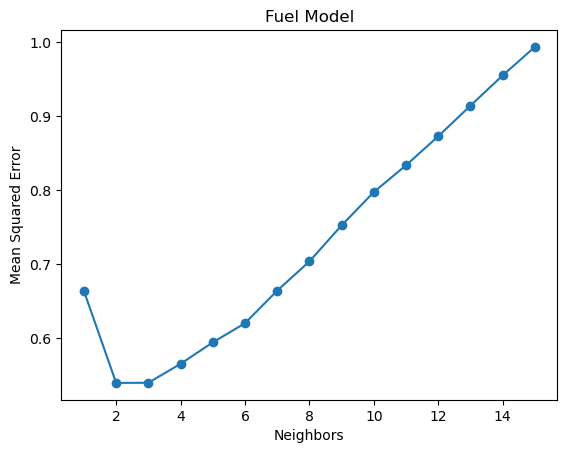

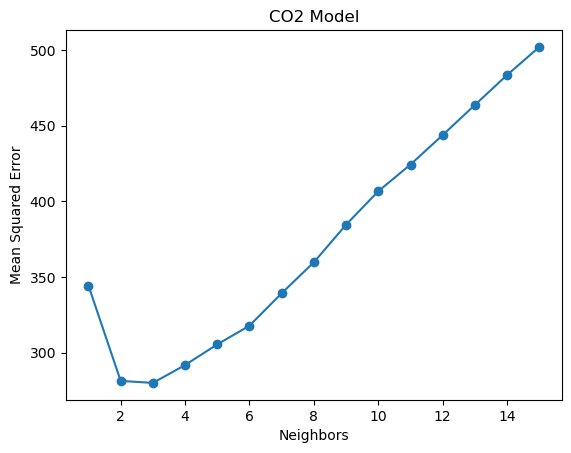

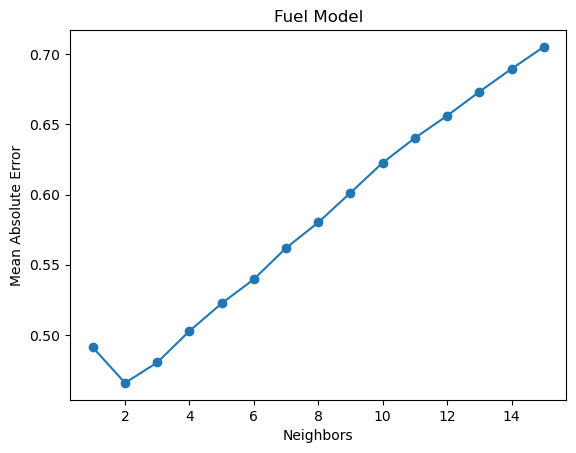

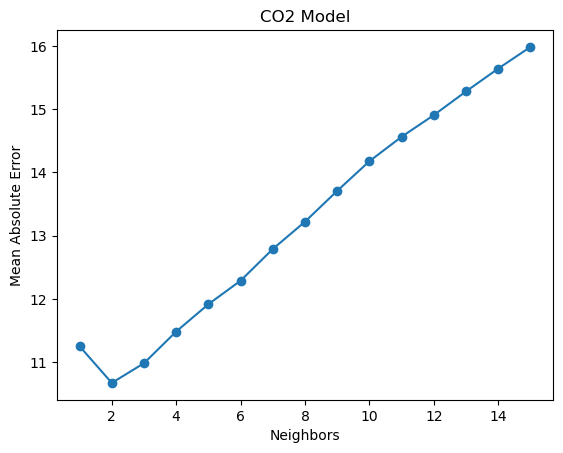

In [18]:
list_neighbors = list(range(1,16))
list_r2_fuel = []
list_r2_CO2 = []
list_mse_fuel = []
list_mse_CO2 = []
list_mae_fuel = []
list_mae_CO2 = []


for i in range(1,16):
    model_fuel = KNeighborsRegressor(n_neighbors=i)
    model_CO2 = KNeighborsRegressor(n_neighbors=i)

    model_fuel.fit(X_train_STANDARDED, y_train_fuel)
    model_CO2.fit(X_train_STANDARDED, y_train_CO2)
    
    y_pred_fuel = model_fuel.predict(standardizer.transform(X_test))
    list_r2_fuel.append(r2_score(y_test_fuel, y_pred_fuel)*100)
    list_mse_fuel.append(mean_squared_error(y_test_fuel, y_pred_fuel))
    list_mae_fuel.append(mean_absolute_error(y_test_fuel, y_pred_fuel))
    
    y_pred_CO2 = model_CO2.predict(standardizer.transform(X_test))
    list_r2_CO2.append(r2_score(y_test_CO2, y_pred_CO2)*100)
    list_mse_CO2.append(mean_squared_error(y_test_CO2, y_pred_CO2))
    list_mae_CO2.append(mean_absolute_error(y_test_CO2, y_pred_CO2))
    
    print(f"for {i} neighbor:")
    print(f"   R2_score for fuel model = " + str(round(r2_score(y_test_fuel, y_pred_fuel), 3) * 100) + "%")
    print(f"   R2_score for CO2 model = " + str(round(r2_score(y_test_CO2, y_pred_CO2), 3) * 100) + "%")
    print(f"   MSE for fuel model = " + str(round(mean_squared_error(y_test_fuel, y_pred_fuel), 2)))
    print(f"   MSE for CO2 model = " + str(round(mean_squared_error(y_test_CO2, y_pred_CO2))))
    print(f"   MAE for fuel model = " + str(round(mean_absolute_error(y_test_fuel, y_pred_fuel))))
    print(f"   MAE for CO2 model = " + str(round(mean_absolute_error(y_test_CO2, y_pred_CO2))) + "\n")
    
                       
plt.scatter(list_neighbors, list_r2_fuel)
plt.plot(list_neighbors, list_r2_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("R2 Score")
plt.show()

plt.scatter(list_neighbors, list_r2_CO2)
plt.plot(list_neighbors, list_r2_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("R2 Score")
plt.show()

plt.scatter(list_neighbors, list_mse_fuel)
plt.plot(list_neighbors, list_mse_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Squared Error")
plt.show()

plt.scatter(list_neighbors, list_mse_CO2)
plt.plot(list_neighbors, list_mse_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Squared Error")
plt.show()

plt.scatter(list_neighbors, list_mae_fuel)
plt.plot(list_neighbors, list_mae_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Absolute Error")
plt.show()

plt.scatter(list_neighbors, list_mae_CO2)
plt.plot(list_neighbors, list_mae_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Absolute Error")
plt.show()